# 学習結果をグラフ化

In [2]:
import numpy as np
import matplotlib.pyplot as plt

RESULT_PATH = '../../data/result/'

In [15]:
n = 5

cpu_train_acc = []
cpu_valid_acc = []
cpu_time = []
for i in range(1, n+1):
  with open(RESULT_PATH + 'kmj_gen_np_train_' + str(i) + '.txt') as file:
    for line in file:
      cpu_train_acc.append(float(line[39:44]))
      cpu_valid_acc.append(float(line[73:78]))
      cpu_time.append(float(line[86:92]))

cpu_train_acc = np.array(cpu_train_acc).reshape(n, -1).mean(axis=0).tolist()
cpu_valid_acc = np.array(cpu_valid_acc).reshape(n, -1).mean(axis=0).tolist()
cpu_time = np.array(cpu_time).reshape(n, -1).mean(axis=0).tolist()

cpu_train_acc.insert(0, 0)
cpu_valid_acc.insert(0, 0)
cpu_time.insert(0, 0)

fpga_train_acc = []
fpga_valid_acc = []
fpga_time = []
for i in range(1, n+1):
  with open(RESULT_PATH + 'kmj_gen_v5_3_acc_' + str(i) + '.txt') as file:
    for line in file:
      fpga_train_acc.append(float(line[23:28]))
      fpga_valid_acc.append(float(line[41:46]))

  with open(RESULT_PATH + 'kmj_gen_v5_3_time_' + str(i) + '.txt') as file:
    for line in file:
      fpga_time.append(float(line[54:60]))

fpga_train_acc = np.array(fpga_train_acc).reshape(n, -1).mean(axis=0).tolist()
fpga_valid_acc = np.array(fpga_valid_acc).reshape(n, -1).mean(axis=0).tolist()
fpga_time = np.array(fpga_time).reshape(n, -1).mean(axis=0).tolist()

fpga_train_acc.insert(0, 0)
fpga_valid_acc.insert(0, 0)
fpga_time.insert(0, 0)

## 計算時間

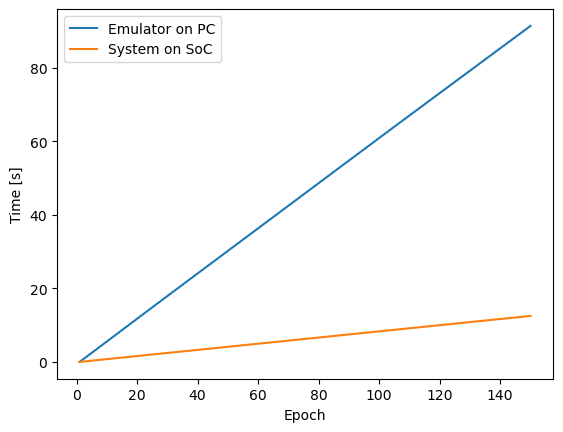

In [16]:
epochs = 150

epoch = range(1, epochs+1)
plt.plot(epoch, cpu_time[:epochs], label='Emulator on PC')
plt.plot(epoch, fpga_time[:epochs], label='System on SoC')
plt.xlabel('Epoch')
plt.ylabel('Time [s]')
plt.legend()
plt.show()

## 正解率

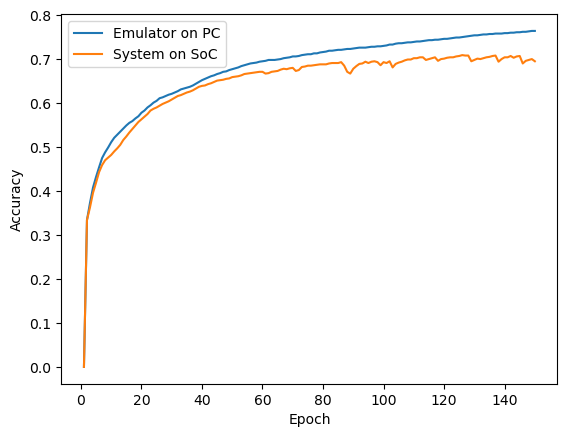

In [17]:
epochs = 150

epoch = range(1, epochs+1)
# plt.plot(epoch, cpu_train_acc[:epochs], label='CPU(train)')
plt.plot(epoch, cpu_valid_acc[:epochs], label='Emulator on PC')
# plt.plot(epoch, fpga_train_acc[:epochs], label='FPGA(train)')
plt.plot(epoch, fpga_valid_acc[:epochs], label='System on SoC')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()